In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rma1 = pd.read_csv("2023-07-05_weaver_cpybench_rma_np1.csv")
rma4 = pd.read_csv("2023-07-06_weaver_cpybench_rma_np4.csv")
mpi1 = pd.read_csv("2023-07-05_weaver_cpybench_mpi_np1.csv")
mpi4 = pd.read_csv("2023-07-06_weaver_cpybench_mpi_np4.csv")

In [3]:
rma4["size"] = rma4["n"]*rma4["n"]*rma4["n"]
mpi4["size"] = mpi4["n"]*mpi4["n"]*mpi4["n"]
rma4["UPs-mean"] = rma4["size"]*rma4["N"]/rma4["time-mean"]
mpi4["UPs-mean"] = mpi4["size"]*mpi4["N"]/mpi4["time-mean"]
rma4["GUPs-mean"] = 1e-9*rma4["UPs-mean"]
mpi4["GUPs-mean"] = 1e-9*mpi4["UPs-mean"]

In [4]:
rma1["size"] = rma1["n"]*rma1["n"]*rma1["n"]
mpi1["size"] = mpi1["n"]*mpi1["n"]*mpi1["n"]
rma1["UPs-mean"] = rma1["size"]*rma1["N"]/rma1["time-mean"]
mpi1["UPs-mean"] = mpi1["size"]*mpi1["N"]/mpi1["time-mean"]
rma1["GUPs-mean"] = 1e-9*rma1["UPs-mean"]
mpi1["GUPs-mean"] = 1e-9*mpi1["UPs-mean"]

In [5]:
def figure_for_attribute_np1(attribute, ylabel=None, points=None):
    if ylabel is None:
        ylabel = attribute
    
    if points is not None:
        rma1["n"] = rma1["n"][:points]
        mpi1["n"] = mpi1["n"][:points]
        rma1[f"{attribute}-mean"] = rma1[f"{attribute}-mean"][:points]
        mpi1[f"{attribute}-mean"] = mpi1[f"{attribute}-mean"][:points]
    
    maxy_rma    = max(rma1[f"{attribute}-mean"])
    maxy_mpi = max(mpi1[f"{attribute}-mean"])
    if maxy_rma > maxy_mpi:
        maxy = maxy_rma
    else:
        maxy = maxy_mpi
        
    plt.figure(figsize=[10,6])
    plt.plot(rma1["n"], rma1[f"{attribute}-mean"], "*-", label="rma1")
    plt.plot(mpi1["n"], mpi1[f"{attribute}-mean"], "*-", label="mpi1")
    plt.title(f"rma versus non-rma copy benchmark ({attribute.replace('_',' ')})")
    plt.legend()
    plt.xlabel("problem size (cubic array of size n)")
    plt.ylabel(ylabel)
    plt.ylim(0,int(maxy+1))
    plt.show()

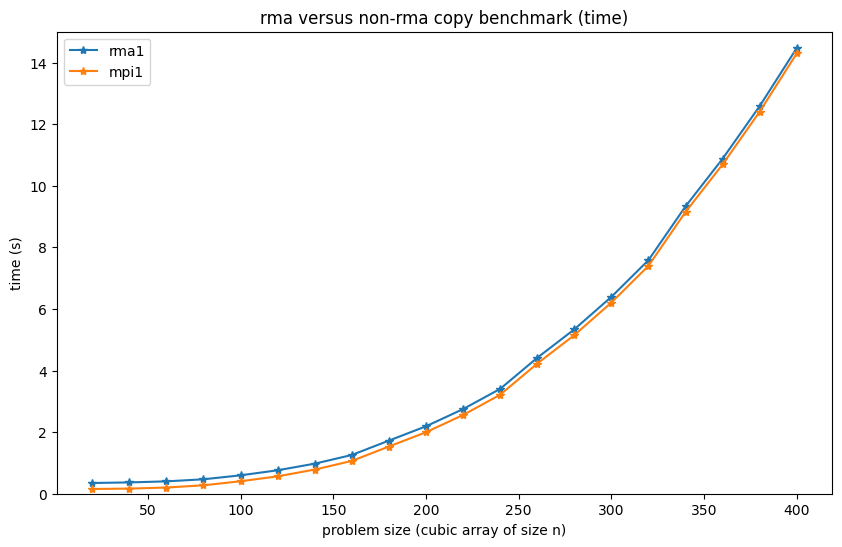

In [6]:
figure_for_attribute_np1("time", "time (s)", 20)

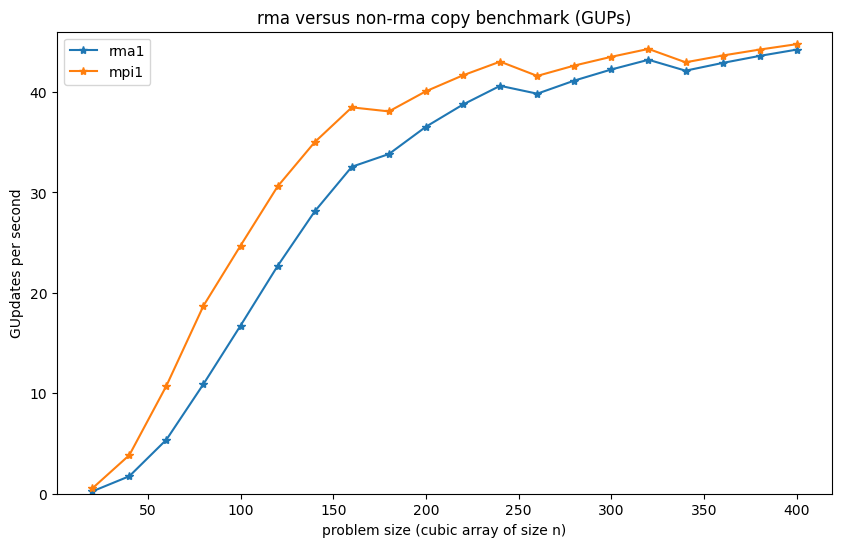

In [7]:
figure_for_attribute_np1("GUPs", "GUpdates per second")